# Challenge 5: Using 127 Qubits

Congratulations on solving the previous challenges! You have shown that you can successfully use dynamic circuits.
As a reward for making it this far you will be able to use one of our 127 qubit devices.

As reminder, in order to earn a badge for completing the Challenge, you need to have finished 4 out of the 5 labs. We made that decision on purpose, because we know this lab will be both (a) challenging technically, and (b) using some of our most cutting edge hardware. The truth of releasing devices above 100 qubits for the public to use is that there may be significant delays in your ability to run your jobs. It's possible (although we hope not!) that you won't successfully run your job by the end of the Challenge. Please know we're doing everything possible behind the scenes to make your experience a success, but we also have a record number of participants in this year's Challenge. Be kind, and don't submit your circuits over and over which will clog the queue.

Alright, take a deep breath. Here we go!

You have seen before that working with actual physical devices brings its own set of challenges. This is even more true when you want to use a large number of qubits, since the pathways can become long, and you have to be mindful of introducing errors. We will use ibm_sherbrook as our device.

In this challenge we want you to prepare a fully entangled 127 qubit state, the so called "GHZ-state", in a clever way.

After that, we will guide you to apply your knowledge of error correction to the 127 qubit GHZ-state in order to then create a good 54 qubit GHZ-state. For this, we will use the even numbered qubits for the 54 qubit GHZ-state, which leaves the odd numbered qubits to be used as stabilizers.

*Note: We will use the same register for the odd and even qubits, even though they will be used differently. We do this because it will make it easier to create the initial 127 qubit GHZ-state, especially when you want to optimize the depth manually.*

In [33]:
# Importing all the parts we need
from typing import List, Optional

from qiskit import transpile, QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.result import marginal_counts

import warnings

warnings.filterwarnings("ignore")

import math

pi = math.pi

# Preparing registers
quantum_register = QuantumRegister(127)
classical_register = ClassicalRegister(127)

# For simplicity we map the physical qubits to the logical qubits directly using the same number.
initial_layout = [
    0,
    1,
    2,
    3,
    4,
    5,
    6,
    7,
    8,
    9,
    10,
    11,
    12,
    13,
    14,
    15,
    16,
    17,
    18,
    19,
    20,
    21,
    22,
    23,
    24,
    25,
    26,
    27,
    28,
    29,
    30,
    31,
    32,
    33,
    34,
    35,
    36,
    37,
    38,
    39,
    40,
    41,
    42,
    43,
    44,
    45,
    46,
    47,
    48,
    49,
    50,
    51,
    52,
    53,
    54,
    55,
    56,
    57,
    58,
    59,
    60,
    61,
    62,
    63,
    64,
    65,
    66,
    67,
    68,
    69,
    70,
    71,
    72,
    73,
    74,
    75,
    76,
    77,
    78,
    79,
    80,
    81,
    82,
    83,
    84,
    85,
    86,
    87,
    88,
    89,
    90,
    91,
    92,
    93,
    94,
    95,
    96,
    97,
    98,
    99,
    100,
    101,
    102,
    103,
    104,
    105,
    106,
    107,
    108,
    109,
    110,
    111,
    112,
    113,
    114,
    115,
    116,
    117,
    118,
    119,
    120,
    121,
    122,
    123,
    124,
    125,
    126,
]
# The "even"" qubits will be used for the 54 qubit GHZ-state
ghz_qubits = [
    0,
    2,
    4,
    6,
    8,
    10,
    12,
    18,
    20,
    22,
    24,
    26,
    28,
    30,
    32,
    37,
    39,
    41,
    43,
    45,
    47,
    49,
    51,
    56,
    58,
    60,
    62,
    64,
    66,
    68,
    70,
    75,
    77,
    79,
    81,
    83,
    85,
    87,
    89,
    94,
    96,
    98,
    100,
    102,
    104,
    106,
    108,
    114,
    116,
    118,
    120,
    122,
    124,
    126,
]
# The "odd" qubits will be used as the stabilizers
stabilizer_qubits = [
    1,
    3,
    5,
    7,
    9,
    11,
    14,
    15,
    16,
    17,
    19,
    21,
    23,
    25,
    27,
    29,
    31,
    33,
    34,
    35,
    36,
    38,
    40,
    42,
    44,
    46,
    48,
    50,
    52,
    53,
    54,
    55,
    57,
    59,
    61,
    63,
    65,
    67,
    69,
    71,
    72,
    73,
    74,
    76,
    78,
    80,
    82,
    84,
    86,
    88,
    90,
    91,
    92,
    93,
    95,
    97,
    99,
    101,
    103,
    105,
    107,
    109,
    110,
    111,
    112,
    115,
    117,
    119,
    121,
    123,
    125,
]

## Step 1: Creating a Large GHZ-state

In many quantum algorithms it is required to entangle several qubits with each other. One often used state in algorithms is the generalized GHZ-state, the state $(\alpha |00...0\rangle + \beta |11...1\rangle)$ with $\alpha = \beta$

The GHZ-state is fully entangled and can be generalized to any number of qubits. We will use it to create an 127 qubit GHZ-state! 
**No matter how many qubits the GHZ-state has when measured either all qubits are 0 or all qubits are 1.**


The challenge here is not to entangle 127 qubits in theory, _but on an actual device_. This means you should take the layout of the device into account (e.g. avoid using CX-gates between qubits which are not directly connected with each other). You should also try to get the circuit depth as low as possible in order to reduce noise.

### Exercise 1

Generate a 127 qubit GHZ-state for the 127-qubit device `ibm_sherbrook` using only Hadamard and CNOT gates. Try to do this with the lowest circuit depth possible.

*Hint: It can help to think first about how you would do it (with minimum depth) for an ideal device where all qubits are connected with each other.*

In [34]:
def generate_ghz127():
    qc = QuantumCircuit(quantum_register, classical_register)

    ####### your code goes here #######
    qc.h(0)
    for i in range (0, 126):
        qc.cx(i, i+1)
    return qc

ghz_circuit = generate_ghz127()
print(ghz_circuit.depth())
#ghz_circuit.draw(scale = 0.5)
#ghz_circuit.draw()

127


In [35]:
# Submit your circuit

from qc_grader.challenges.spring_2023 import grade_ex5a

grade_ex5a(ghz_circuit)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


## Step 2: Reducing the Size by half

We now want to use the GHZ-state you created to form a reduced GHZ-state only using the even numbered Qubits. For this we will need to unentangle the odd qubits, so that they can be measured without letting the GHZ-state collapse.

Since we want to unentangle the Qubits, we can do it in a way to generate **stabilizers**, similar to what you did in Lab 4. The stabilizers must be 0 if both qubits that they are connected with have the same value, and they must be 1 if those values is different.

What's the point in doing this? The astute observer might have already realized it - we can use these stabilizers to apply error correction to the reduced GHZ-state.

### Exercise 2

Unentangle the odd qubits of the created GHZ-state in order to create stabilizers. Again, you can challenge yourself to make the circuit depth as small as possible.

*Hint: Take into account how you created your GHZ-state above. Your method of unentangling is specific to how it was created.*

In [37]:
def deentangle_qubits():
    qc = QuantumCircuit(quantum_register, classical_register)

    ####### your code goes here #######
    for i in range(len(quantum_register)):
        if i not in ghz_qubits:
            qc.cx(ghz_qubits[0], i)
    
    return qc
    
unentangle_circuit = deentangle_qubits()
print(unentangle_circuit.depth())
#unentangle_circuit.draw(scale = 0.5)
complete_circuit = ghz_circuit.compose(unentangle_circuit)



73


In [38]:
# Submit your circuit

from qc_grader.challenges.spring_2023 import grade_ex5b

grade_ex5b(complete_circuit)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


Good work. Now since all odd qubits are unentangled from the even qubits, we can measure them without collapsing the GHZ-state.

In [39]:
# Measuring stabilizers this can also be used in post processing to see what went wrong.


def measure_stabilizers():
    qc = QuantumCircuit(quantum_register, classical_register)
    qc.measure(stabilizer_qubits, stabilizer_qubits)
    return qc


stabilizer_circuit = measure_stabilizers()

These measurement results could be used to improve the 54 qubit GHZ-state, but we'll explore that idea later.

After having measured the odd qubits, you could reset them and use the 54 GHZ-state in your algorithm, using the odd qubits as potential auxilliary qubits. However, before using your GHZ-state, let's test how good it is.

We need to measure the 54 qubit GHZ-state!

In [40]:
# Measuring the GHZ qubits


def measure_ghz():
    qc = QuantumCircuit(quantum_register, classical_register)
    qc.measure(ghz_qubits, ghz_qubits)
    return qc


measure_circuit = measure_ghz()

Now let's put everything together, so that we can test it.

In [41]:
# Everything together

simple_ghz = (
    ghz_circuit.compose(unentangle_circuit)
    .compose(stabilizer_circuit)
    .compose(measure_circuit)
)

## Step 3: Preparing and Running on the Device

We are now ready to run our GHZ-state on a real device, and for that it's time for `ibm_sherbrooke`

There are not many people in the world who have worked with 127 qubits. You will be soon one of the few brave souls to say you have. One small step for quantum computing, one giant leap for your CV. 

Just kidding :-P

-----

First we prepare everything we need:

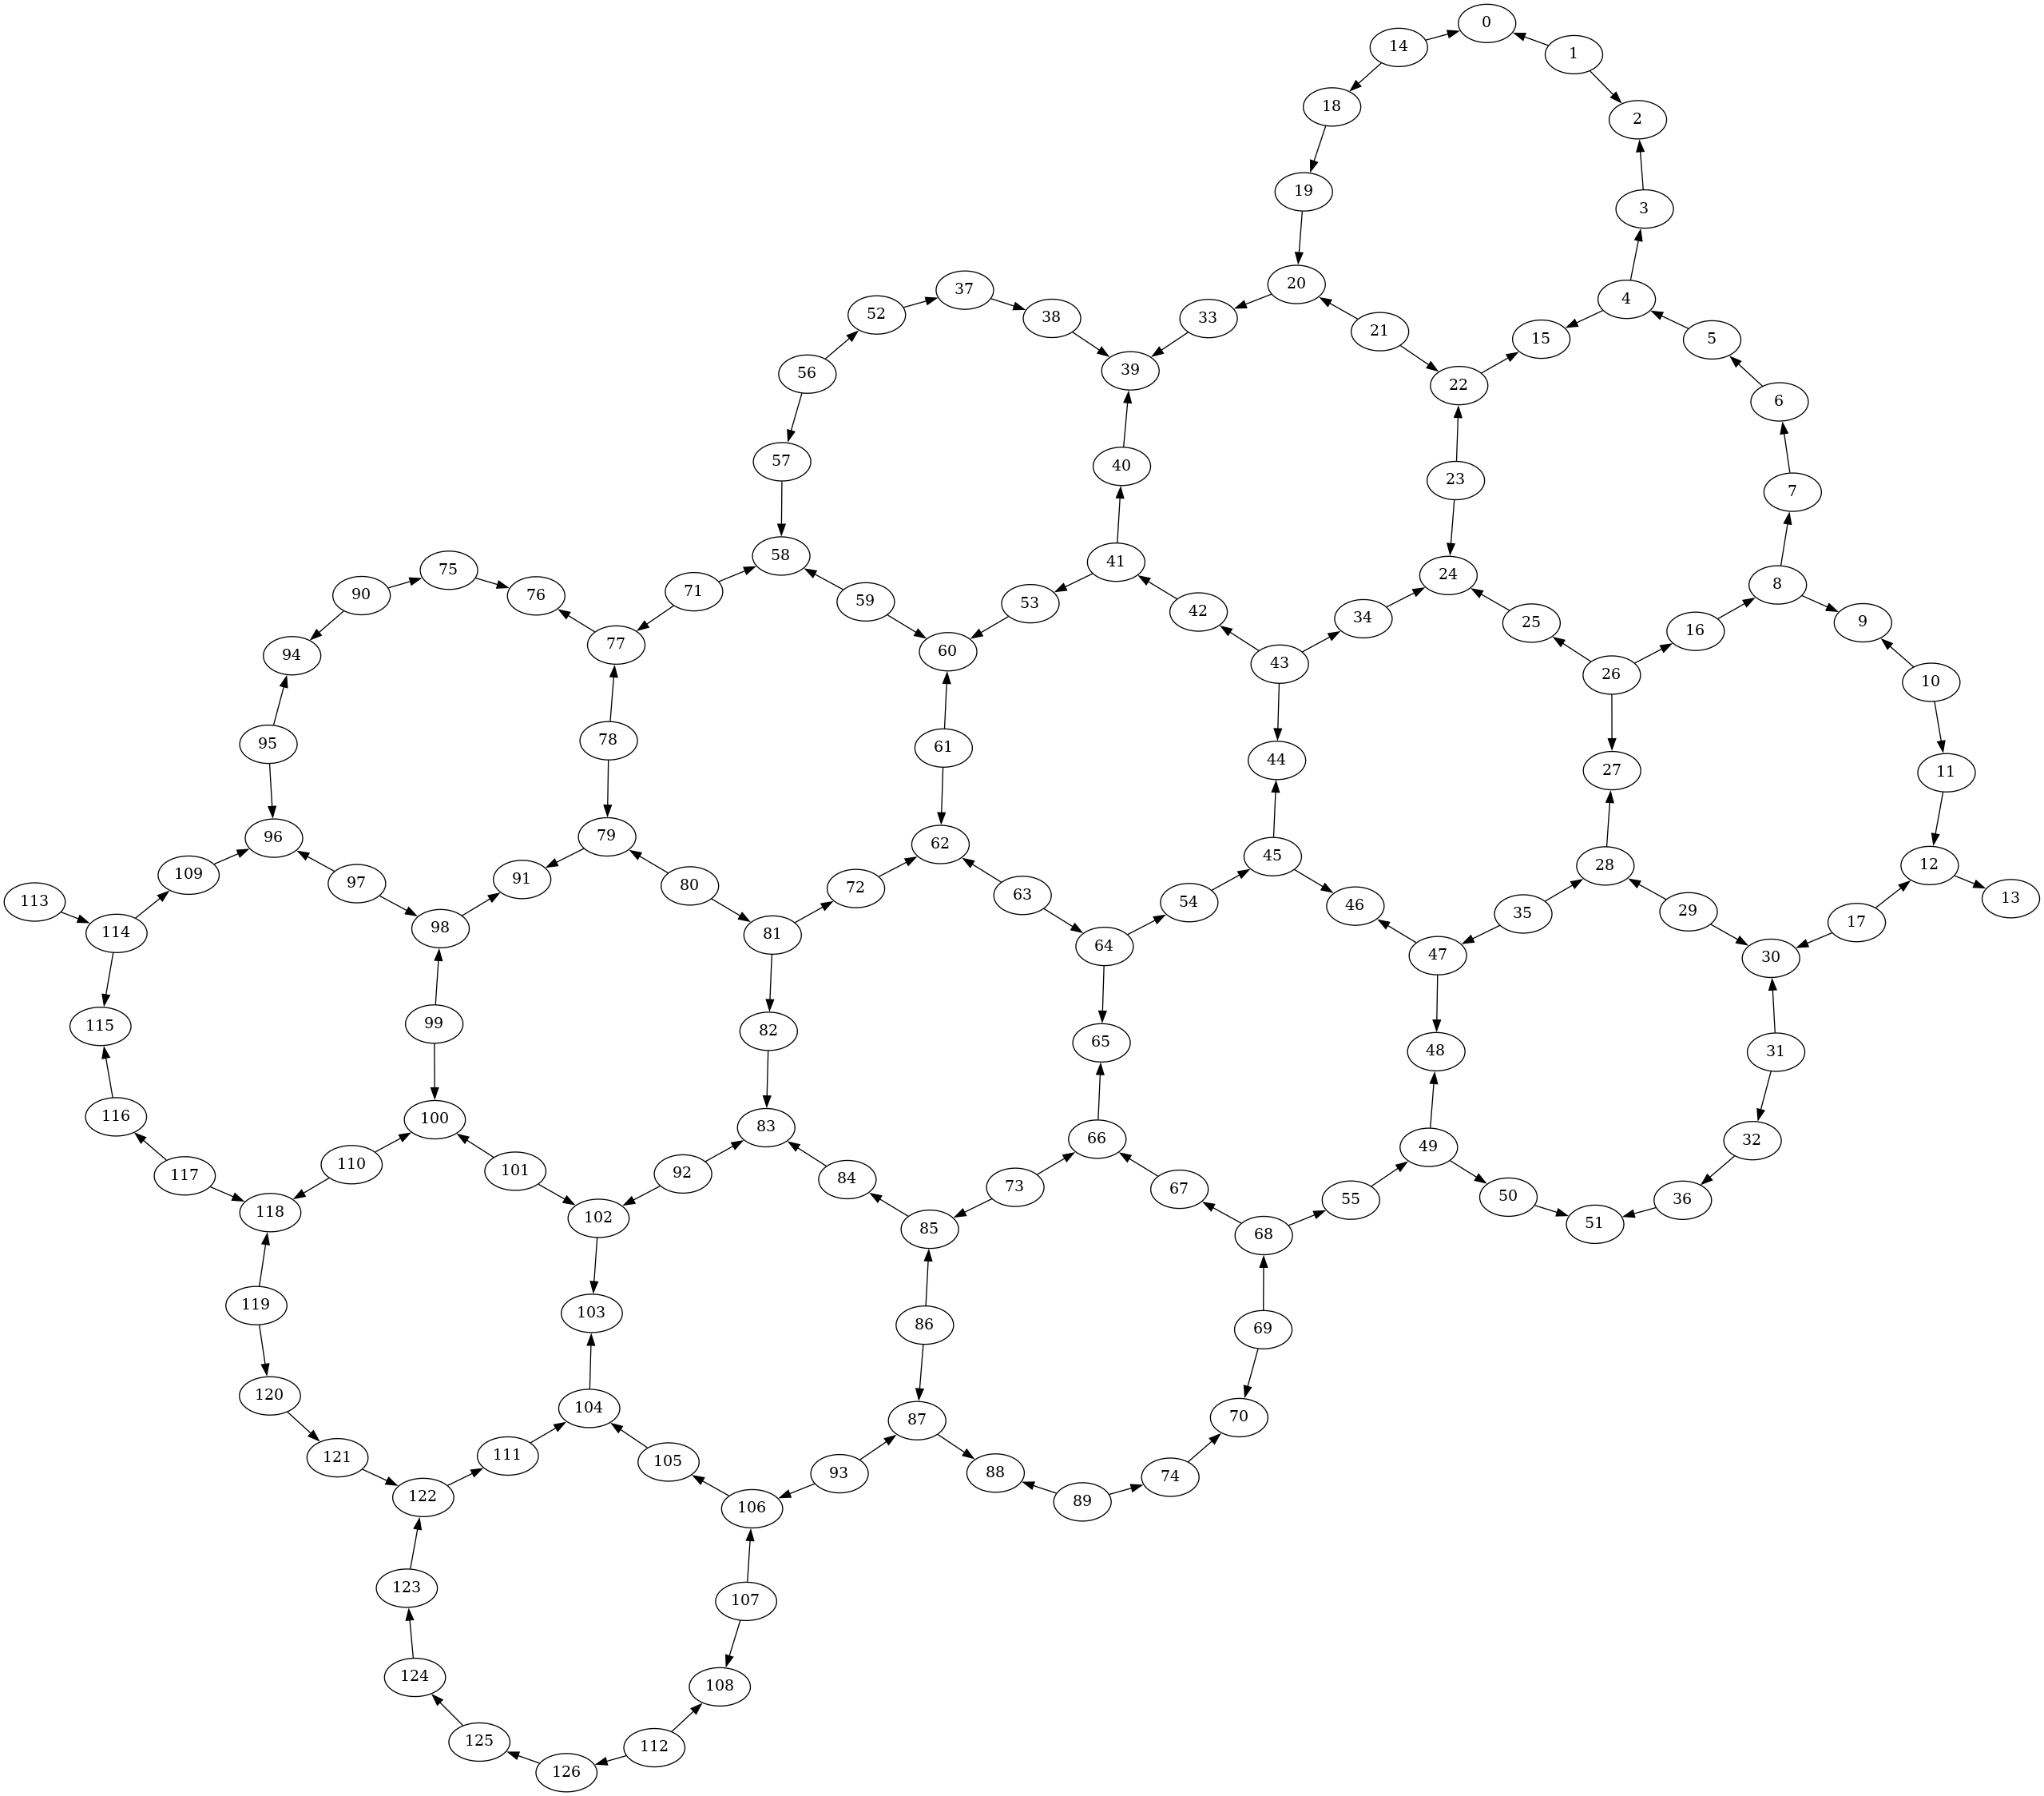

In [42]:
# Importing provider and getting access to the system
from qiskit_ibm_provider import IBMProvider
from qiskit import transpile


provider = IBMProvider()

hub = "HUB"
group = "GROUP"
project = "PROJECT"

backend_name = "ibm_sherbrooke"
backend = provider.get_backend(backend_name, instance=f"{hub}/{group}/{project}")

number_of_shots: int = 1024
backend.coupling_map.draw()

We start by transpiling it for the actual device. This should not cause too many changes, since you (should have) had the physical device in mind when making the circuit originally, and only used connections which exist.

If you didn't do that, now's a good time to go back and fix that, or hop over to the Discord to talk with others about how to think through that process.

In [43]:
# First we transpile the GHZ-state for the actual device
qc_transpiled = transpile(simple_ghz, backend, initial_layout=initial_layout)

Now we're ready to run the job on the 127-qubit device. Let's add some tags here to make it easier to find them in the future.

Running the job will take some time, depending of how many other people are in the queue trying to run their jobs. Have you had your coffee yet today? Or maybe you're more of a tea drinker. I hear there's a great new show on Netflix.

In [44]:
# Now we can run the job
# We add memory=true to be easier able to analyse  how good the result were and the tags to make it easier to find it later.
job = backend.run(
    qc_transpiled,
    shots=number_of_shots,
    memory=True,
    job_tags=["ghz_state", "spring_challenge"],
)

job_id = job.job_id()
print(job_id)

chn6c7u21vj7u8g19510


In case you are coming back later, and want to retrieve a job, you can find it in the IBM Quantum Computing Homepage with the tags used above.

Copy the name of your job (its id) and replace the *job_id* in the cell below with yours. A job id should look something like this: *ch36cf1pleju56fajrqg*

Or you can just directly use the job_id of above cell.

In [14]:
# Change job id to the id of your previous submitted job something like "ch36cf1pleju56fajrqg"
# You only need to run this if you come back at a later time
job = provider.backend.retrieve_job()
job.status()

<JobStatus.DONE: 'job has successfully run'>

In [30]:
# Getting the data of the job for testing
data = job.result().get_memory()

## Step 4: Testing the GHZ-state

You did it! You've run a GHZ-state circuit on a 127-qubit machine. That's awesome!!!

Now that you have the results of your GHZ-state, it's time to examine it. We did not add any error mitigation or error correction, so you should expect results which still can be improved.

There are different ways to test how "good" the results are. You can just look at the raw results, but since the qubits which are used for the GHZ-State are not next to each other, this might be a bit annoying. Having a function tell us about the quality, or about the errors in the GHZ-State, would be useful.

### Exercise 3

Create a function to test the GHZ-state.

As Challenge authors, we decided to give you some freedom here in how you want to test your results. Please find a way which makes sense **for you.** It's important to say that the _lower the output_ of your function, the the _better_ your GHZ-state is.

*Hint: This function should be made to test the data we have created, so you only need to test the qubits which are part of the GHZ-state*

In [45]:
# A function to test the quality of a GHZ-state. The lower the better
def test_ghz(data):
    ghz_qubits = [
        0,
        2,
        4,
        6,
        8,
        10,
        12,
        18,
        20,
        22,
        24,
        26,
        28,
        30,
        32,
        37,
        39,
        41,
        43,
        45,
        47,
        49,
        51,
        56,
        58,
        60,
        62,
        64,
        66,
        68,
        70,
        75,
        77,
        79,
        81,
        83,
        85,
        81,
        89,
        94,
        96,
        98,
        100,
        102,
        104,
        106,
        108,
        114,
        116,
        118,
        120,
        122,
        124,
        126,
    ]

    ####### your code goes here #######
    quality_list = []
    average = 0
    best = len(data)
    worst = 0

    for result in data:
        count_zeroes = 0
        count_ones = 0
        bit_count = -1
        for bit in result:
            bit_count = bit_count + 1
            if bit_count not in ghz_qubits:
                continue
            if bit == "0":
                count_zeroes = count_zeroes + 1
            else:
                count_ones = count_ones + 1
        if count_ones < count_zeroes:
            count_zeroes = count_ones

        quality_list.append(count_zeroes)
        average = average + count_zeroes

        if count_zeroes > worst:
            worst = count_zeroes
        if count_zeroes < best:
            best = count_zeroes

    average = average / len(data)
    print(average)
    print(worst)
    print(best)
    return average

    #you can test data for any state.
    #data will be a list of strings containing the state prepared for each shot of the circuit.
    #Here's a 3 qubit example for 5 shots
    #data=['110','110','010','011','111']

test_ghz(data)

You now have a number rating your results, based on a function you designed. 

Before we go on, think about your method. 
- What would the number be for a really good state? 
- What about for a really bad state? 
- What does a "bad state" even look like? 
- How can you design a function that's easy for someone to understand what its telling them? 

These are all questions that IBM Researchers think about daily, and it keeps us extremely motivated to continue to make our devices and services as strong and easy-to-understand as possible. If this type of work is interesting to you as well, let us know!

Now let's test your testing function and let's see if it does what it should. Remember, it should give low results for good states, which have fewer errors, and high results for states with lots of errors.

In [46]:
# Submit your circuit

from qc_grader.challenges.spring_2023 import grade_ex5c

# Since we test here a function, we do not need brackets after test_ghz, since the input is the function
grade_ex5c(test_ghz)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


Now the question is: how can we improve on it?

One of the first steps would be to try to decrease the depth of the circuit further. Let's look at the depth of your transpiled circuit:


In [18]:
qc_transpiled.depth()

1843

We can see that the depth got bigger during the transpilation process, by more than a factor of 2.

Take a peek at how it looks, to see where this additional depth comes from:

In [19]:
qc_transpiled.draw()

ValueError: Image size of 2354x884388 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 2354.59x884388 with 1 Axes>

What we see is that the Hadamard gate and the CX-gate got transpiled into other Gates. This is not surprising for the Hadamard gate, since none of the IBM Quantum devices support it directly. A Hadamard is always constructed using 3 rotations. On the other hand, the ECR-gate which you see is new, and only used in some devices. It is also an entangling gate, similar to the CX-gate, but it works a bit different. A CX-gate can be made using only a single ECR-gate and local rotations.

You can find more about the ECR-gate here: https://qiskit.org/documentation/stable/0.39/stubs/qiskit.circuit.library.ECRGate.html 

Reducing depth is often the best way to minimize the error rate. Now that you know that the ECR-gate is used instead, could you make a circuit with a better depth?

If you are interested in exploring that question and other methods to make the GHZ-state better, feel free to read on. The following part of the Lab is just a bonus: there are no exercises left. It is meant as a short outlook to show how error correction could be used, but also showing why error correction can be hard. 


Whether you choose to continue or not, give yourself a round of applause: **You have just completed the IBM Quantum Challenge: Spring 2023!** Go brag about it to everyone else in the Discord, we'll see you there!

# Bonus: The Way to Correcting Errors


Error correction is still an active and important research topic. So correcting errors on a real device, even in a simple case like our GHZ-state example, is not that straight forward and we want to give you the opportunity to come up with your own ideas, while giving you some guidance and hints on what potential ways could be.



## Step 1: How good is the actual State?

Before we can correct any errors, we first need to know how good the state was, and even this is not as straight forward as one might think.


The simplest way for testing how good your GHZ-state was, is to test how many of the even numbered qubits have different results from the majority. This is what you have most likely used above.


However, this does not necessarily mean that this also correlated with the number of errors which occurred . And one could say that the number of errors which occurred  is more important, for telling how good the GHZ-state is.


**Example A** to illustrate this thought: Let's say we have 10 qubits connected in a line and form a GHZ-state with them:

0 - 1 - 2 - 3 - 4 - 5 - 6 - 7 - 8 - 9

If we now say that error occurred  not in the readout, but when applying the entangling gate between qubit 4 and qubit 5 the output could look like this:

0000011111 

This would be the worst possible result for the measurement "how many qubits have the same result".

For this reason a run in which more errors occurred, could actually lead to a better measure for "how many qubits have the same result" although most likely that state would be a lot less useful.

If the above state would have been created and you had (working) stabilizer measurements between the qubits, you would only have the one between qubit 4 and 5 be 1. And to correct that error you could potentially just flip qubits 5-9.


To get a first idea on how the errors look like for your case, it might be a good idea, to look at the raw data, the results which you got from running it on the actual device, and taking into account how you built the GHZ-state.


For **Example A**  we could maybe find an error correction which would look like this:


In [20]:
# Simple idea for Example A find where the error happened and flip accordingly
def correct_ghz():
    qc = QuantumCircuit(quantum_register, classical_register)

    with qc.if_test((classical_register[9], 1)):
        qc.x(quantum_register[9])

    with qc.if_test((classical_register[8], 1)):
        qc.x(quantum_register[8])

    with qc.if_test((classical_register[8], 1)):
        qc.x(quantum_register[9])

    with qc.if_test((classical_register[7], 1)):
        qc.x(quantum_register[9])

    with qc.if_test((classical_register[7], 1)):
        qc.x(quantum_register[8])

    with qc.if_test((classical_register[7], 1)):
        qc.x(quantum_register[7])

    # ...

    # qc.barrier()
    return qc


correcting_circuit = correct_ghz()

And if we would now adapt the above code to our 54 GHZ case, we could build everything together:


In [21]:
# Everything together corrected

error_corrected_ghz = (
    ghz_circuit.compose(unentangle_circuit)
    .compose(stabilizer_circuit)
    .compose(correcting_circuit)
    .compose(measure_circuit)
)

## Step 2: Why considering single stabilizers might not be enough.

In the error correction exercise, we have seen that you could either use single bits, or the whole bitstring from the measurement of the stabilizer qubits in order to condition operations on them.

Since our stabilizer measurements are 54 bits long, using the whole bit strings to condition on them, is not feasible, since this would need 2^54 different bitstrings which need to be considered.


On the other hand, if we just consider single bit it might not be possible/overly complicated.


**Example B**: We have again 10 qubits connected in a line and form a GHZ-state with them:

0 - 1 - 2 - 3 - 4 - 5 - 6 - 7 - 8 - 9

Now we assume that we get as the measurement result 0000010000

If we have stabilizer measurements in this case the one on the right of the 1 and the one on the left of the 1 would both have value 1.

This means in this case just looking at a single stabilizer would not be enough to know that you only need to flip qubit number 5 (and no others), unless we would be ok with flipping some qubits several times, which is not ideal. 

So in this case it would be ideal if we could apply functions to the measurement results of the stabilizers, and use their results for as conditions in the dynamic circuits. 

This is possible, however, this needs to be done in Open QASM3 code, instead of in Qiskit, which will not be covered in this exercise.
If you are interested to learn more about Dynamic Circuits with Open QASM3 you can find information about it here: 

https://quantum-computing.ibm.com/services/resources/docs/resources/manage/systems/dynamic-circuits/Dynamic-Circuits-basics-with-OpenQASM3


Below is a simple example to show you how Open QASM3 code looks like:


OPENQASM 3;
bit[2] c;
rz(-3.141592653589793) $0;
sx $0;
rz(-1.5707963267948966) $1;
sx $1;
rz(-3.141592653589793) $1;
ecr $1, $0;
rz(-1.5707963267948966) $0;
sx $0;
rz(1.5707963267948966) $0;
rz(1.5707963267948966) $1;
sx $1;
rz(1.5707963267948966) $1;
c[0] = measure $0;
c[1] = measure $0;



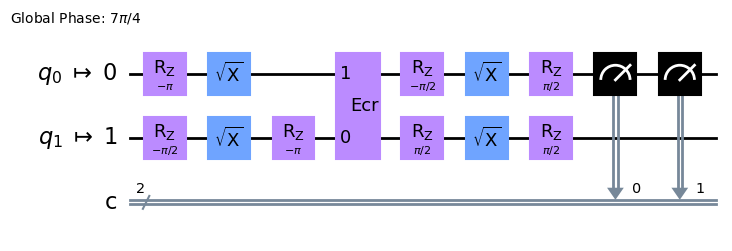

In [22]:
from qiskit import qasm3, QuantumCircuit, transpile

# Creating a bell circuit
qc_bell = QuantumCircuit(2, 2)
qc_bell.h(0)
qc_bell.cx(0, 1)
qc_bell.measure(0, 0)
qc_bell.measure(0, 1)

# Transpiling it for our device (as above it does not have the H- and CX- Gates)
qc_bell = transpile(qc_bell, backend)

# Generate qasm3 code before we can print it
exporter = qasm3.Exporter(
    includes=[], disable_constants=True, basis_gates=backend.configuration().basis_gates
)
print(qasm3_bell := exporter.dumps(qc_bell))

# Draw a circuit as comparison
qc_bell.draw(output="mpl", idle_wires=False)

## Step 3: How not to introduce more Errors


There are different reasons which can lead to errors. Decoherence over time and errors introduced in entangling gates like the CX-Gate are two of them. Both of them can also apply to the stabilizers and we have to make sure to not introduce more noise by our attempts of correcting it, since that would beat the whole purpose. This might be less of a problem in the future, when the general error rate will go further down, but is still something which needs to be considered.

What does this mean for us?

Well one can think of when we want to create and measure the stabilizers. Do we unentangle them directly after they are no longer used for entangling the next qubit?  Do we wait until the whole circuit is entangled? (This of course depends on which kind of errors we might want to correct). We can also think about resetting the stabilizers and create new ones later (using the same qubits) and use 2 phases in which we try to correct errors.



And we can think of what the probability is that an error occurred  from entangling a qubit (through the stabilizer) and compare it to the probability that an error is introduced in the stabilizer by unentangling it. So maybe having the stabilizers just makes it worse?

When is this worth it? You can play around with the code below to get some impressions and ideas, again this is something which can change in the future, when error rates will go further down.

In [23]:
# All the probabilities here only consider errors introduced by the CX gate and assumes they are bit flip errors.

# Probability for a single CX gate
p1 = 0.01
# Probability that there is an error after 2 CX gates (going through stabilizer)
p2 = p1 * (1 - p1) + (1 - p1) * p1
# Probability that the stabilizer shows something wrong even though it is correct
p3 = p1 * p1 + (1 - p1) * (1 - p1) * p1

print("Probability of a single cx having an error: {}".format(p1))
print("Probability of having an error after 2 cx: {:.4f}".format(p2))
print("Probability of the stabilizer showing a non existent error: {:.4f}".format(p3))

Probability of a single cx having an error: 0.01
Probability of having an error after 2 cx: 0.0198
Probability of the stabilizer showing a non existent error: 0.0099


## Step 4: What can one do?

There are a lot of possibilities you can try:



- You can try to find some good logical functions using several stabilizers and use QASM3

- You can think about resetting the stabilizers and reusing them.

- You can try if the simple approach as seen in example A could be made to work (by changing the timing of when the measurements are made.)

- You can find your own idea! be creative!


What is important for all of them is that you not just blindly start trying on the quantum computer, but instead try to verify your ideas first using the data of letting the initial GHZ-state run on the device.

You have created testing data above: You have the output of the GHZ-state and also the output of the stabilizers.


If your approach does not work as postprocessing, then running it on the actual device, where all the operations have a further error rate, will also not work.

When you have an algorithm which works in theory with the data you have (and generated better GHZ-state according to your test you can use the code below to try to let your whole circuit, including the error correction, run on the actual device. 

*Hint: Make sure you use the error_correction function above and also generate the error_corrected_ghz above.*

In [24]:
# First we transpile the GHZ-state for the actual device
qc_corrected_transpiled = transpile(
    error_corrected_ghz, backend, initial_layout=initial_layout
)

# Now we can run the job
job_corrected = backend.run(
    qc_corrected_transpiled,
    dynamic=True,
    shots=number_of_shots,
    memory=True,
    job_tags=["dynamic", "spring_challenge"],
)

job_id = job_corrected.job_id()
print(job_id)

chn5b9s6f7i49rrlirp0


In [25]:
job_corrected = provider.retrieve_job('chm92t46f7i49rqufjlg')
job_corrected.status()

<JobStatus.DONE: 'job has successfully run'>

In [26]:
# And get the results back
counts_corrected = job_corrected.result().get_counts()